In [1]:
import torch
from pathlib import Path
from siren.models.dcgan import Model as DCGAN
from siren.models.sirengan import Model as SIRENGAN
from siren.models.generate import walk

In [2]:
model = SIRENGAN()
model.load(Path('../models/sirengan').expanduser())

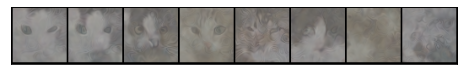

In [3]:
walk(
    model,
    torch.FloatTensor(1, 2),
    torch.randn(1, 2),
    torch.randn(1, 2),
    8,
    Path('../reports/figures/sirengan'))

In [4]:
from siren.shader.utils import dump, serialize

in_w = dump(model.G.main[0].linear.weight)
in_b = dump(model.G.main[0].linear.bias)
print(in_w)
print(in_b)

out_w = dump(model.G.main[-1].weight)
out_b = dump(model.G.main[-1].bias)
print(out_w)
print(out_b)

[[-0.11017593 -0.22324674 -0.0355806  -0.03828983]
 [ 0.01435251 -0.19813164  0.11827813 -0.06891396]
 [-0.06694116  0.02014093 -0.07859443  0.0490237 ]
 [ 0.04341099 -0.14137632  0.108308   -0.06232793]
 [ 0.2043111   0.01087475  0.21264327  0.11187754]
 [-0.17963964  0.17771448  0.19011956 -0.13720605]
 [-0.01841329  0.12752827  0.06662029  0.17687674]
 [-0.22723645  0.04900226  0.06397921 -0.03340442]
 [ 0.00474945 -0.04403612  0.17242621 -0.04316154]
 [-0.14219195  0.16358905  0.00326754  0.00048581]
 [-0.05157358 -0.01749783 -0.16836087  0.12441956]
 [-0.139539    0.12162116  0.13027355 -0.07214244]
 [ 0.03891968  0.18058603  0.05186475 -0.00183096]
 [ 0.1026234  -0.06205459 -0.04017179  0.02074855]
 [-0.07767829  0.1168768   0.10766529 -0.05701252]
 [ 0.08767819 -0.25679803 -0.16396728  0.07865458]
 [-0.06492256 -0.07169364 -0.06146089  0.03105436]
 [-0.01393241 -0.23797272 -0.1153556   0.06054359]
 [-0.01998264  0.01086797  0.10358826 -0.05663443]
 [-0.01282618 -0.00442469  0.03

In [5]:
serialize(model.G, 'f')

vec4 f0_0 = sin(p.x * vec4(-3.305,.4306,-2.008,1.302) + p.y * vec4(-6.697,-5.944,.6042,-4.241) + p.z * vec4(-1.067,3.548,-2.358,3.249) + p.w * vec4(-1.149,-2.067,1.471,-1.87) + vec4(8.435,-1.325,6.935,10.12));
vec4 f0_1 = sin(p.x * vec4(6.129,-5.389,-.5524,-6.817) + p.y * vec4(.3262,5.331,3.826,1.47) + p.z * vec4(6.379,5.704,1.999,1.919) + p.w * vec4(3.356,-4.116,5.306,-1.002) + vec4(12.11,2.701,3.917,-14.29));
vec4 f0_2 = sin(p.x * vec4(.1425,-4.266,-1.547,-4.186) + p.y * vec4(-1.321,4.908,-.5249,3.649) + p.z * vec4(5.173,.09803,-5.051,3.908) + p.w * vec4(-1.295,.01457,3.733,-2.164) + vec4(13.12,-7.893,14.47,8.544));
vec4 f0_3 = sin(p.x * vec4(1.168,3.079,-2.33,2.63) + p.y * vec4(5.418,-1.862,3.506,-7.704) + p.z * vec4(1.556,-1.205,3.23,-4.919) + p.w * vec4(-.05493,.6225,-1.71,2.36) + vec4(7.989,-4.938,-2.713,1.837));
vec4 f0_4 = sin(p.x * vec4(-1.948,-.418,-.5995,-.3848) + p.y * vec4(-2.151,-7.139,.326,-.1327) + p.z * vec4(-1.844,-3.461,3.108,1.035) + p.w * vec4(.9316,1.816,-1.699,2.